# Introduction

[Goodreads](https://www.goodreads.com/) is a social cataloging website that helps readers search from its wide array of books, look at reviews and ratings, provide recommendations and so on. They also publish 'Best of the Year' books across different categories based on votes from their readers. In this analysis, I am looking at their ['Best of 2019'](https://www.goodreads.com/choiceawards/best-books-2019) books across 20 categories - Fiction, History, Mystery Thriller, Debut Novels, Cookbooks etc. 

In each category, there are 20 books (the top 20) so in total we have 20 categories * 20 books per category = 400 individual books. In some cases, a certain book can exist in two categories - for example 'The Silent Patient by Alex Michaelides' is both a Mystery Thriller and also a Debut Novel. Fun fact: this book has the highest rating count and review count across all 400 books, so this is definitely going on my 'to read' list.

As a book lover, I had a lot of fun doing this anaysis and in the 'Motivation for the Analysis' section, you can read the main questions I wanted to answer. I generally read just Fiction but looking at some of the reviews/ratings here, I am going to delve into a few other categories like Thrillers, Fantasy etc. Happy reading!

Note 1: The entire analysis is based purely on the 400 books that come under the 'Best of 2019' list, so they are not fully representative of the entire category they fall under. Just something to keep in mind.

Note 2: This analysis report does not contain all the code involved in gathering/cleaning the data but it contains only the key visualizations. If you want to look at the full code, click [here](https://github.com/digdeeperisay/good-reads-best-of-2019/blob/master/Goodreads%20-%20Best%20of%202019%20Books%20-%20Full%20Code.ipynb). Data obtained using Python's BeautifulSoup and cleaned/analyzed/visualized using Pandas, Matplotlib, and Seaborn.

# Overview of the Data

The data was scraped from the Goodreads website using Python's BeautifulSoup. There were two parts to the data collection process

1. Collecting the list of top 20 books in each of the 20 categories along with its title, number of votes, and category (this was all available under the 'Best of 2019' links)
2. For each of the 400 books, navigating outside the 'Best of 2019' links and getting the rating, rating count, and review count. These three columns are not directly related to the 'Best of 2019' voting process but more generally available

The final, cleaned dataset can be downloaded from [here](https://github.com/digdeeperisay/good-reads-best-of-2019/blob/master/goodreads_best_of_2019_cleaned_data.csv).

In [6]:
#Reading the CSV and displaying top 5 records
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('goodreads_best_of_2019_cleaned_data.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount,Position,PositionAndTitle
0,Fiction,98291,42975172,https://www.goodreads.com/book/show/42975172-t...,The Testaments by Margaret Atwood,4.21,167861,18041,1,1 - The Testaments by Margaret Atwood
1,Mystery thriller,68821,40097951,https://www.goodreads.com/book/show/40097951-t...,The Silent Patient by Alex Michaelides,4.09,365819,39076,1,1 - The Silent Patient by Alex Michaelides
2,Debut novel,44936,40097951,https://www.goodreads.com/book/show/40097951-t...,The Silent Patient by Alex Michaelides,4.09,365819,39076,2,2 - The Silent Patient by Alex Michaelides
3,Historical fiction,82483,40597810,https://www.goodreads.com/book/show/40597810-d...,Daisy Jones & The Six by Taylor Jenkins Reid,4.21,211493,32219,1,1 - Daisy Jones & The Six by Taylor Jenkins Reid
4,Fantasy,53430,43263680,https://www.goodreads.com/book/show/43263680-n...,Ninth House by Leigh Bardugo,4.08,63377,11891,1,1 - Ninth House by Leigh Bardugo


In [7]:
#Listing out the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
Category            400 non-null object
NumberOfVotes       400 non-null int64
BookID              400 non-null int64
Hyperlink           400 non-null object
Title               400 non-null object
Rating              400 non-null float64
RatingCount         400 non-null int64
ReviewCount         400 non-null int64
Position            400 non-null int64
PositionAndTitle    400 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 31.4+ KB


As seen above, we have 400 records and 10 columns. Out of the 10 columns, the 'BookID' and 'Hyperlink' columns are not really useful but they were useful in sourcing the other columns. 

'Position' is a derived column that shows the ranking of a book within each category and goes from 1-20 per category. 'PositionAndTitle' is also a derived column that is used in one of the visualizations below. The other columns are pretty self-explanatory.

# Motivation for the Analysis

I wanted to gain insight into the below questions as part of this analysis. Obviously there are several other things possible with this dataset but the below set of questions served as the motivation for this report.

1. How does the Number of Votes, Average Rating, Rating Count, and Review Count vary by each category? Each of these varaibles signify a different meaning and looking at them across categories will be interesting
2. When the top 20 books in each category are ordered by their Position (i.e. Ranking), does the general Rating also follow a similar pattern? I am trying to see if there is a difference in how users votes for a book vs. how the general audience rates a book
3. Does Rating Count/Review Count have a relationship with Rating? I am trying to see if more ratings/reviews drive the rating up/down

# Insight 1

Question: How does the Number of Votes, Average Rating, Rating Count, and Review Count vary by each category?

Insight:

1. Fiction and Fantasy type categories have the highest number of voters followed by Mystery Thrillers and Romance which is pretty intuitive. Also, the Poem and Picture categories have the least voters and hence probably a smaller audience
2. Since all these books made the Best of 2019 list, the average rating is generally high and somewhat similar across all categories. However, Fiction and Mystery Thriller are two categories that are high up in the 'Number of Votes' chart but towards the lower end in the 'Rating' chart
3. The number of ratings for the top 4 categories are really high but from the 5th category onwards, this drop is pretty high indicating that the top 4 categories are much more popular than the others
4. Looking at the number of reviews, we notice something interesting. Debut Novels have the highest number of reviews. A review takes time to write and provides more insight than a rating and it makes intuitive sense that debut novels/authors garner more reviews

Fun fact: Food cookbooks have both the lowest rating count and review count. I guess this could be because there are way too many other online resources available.

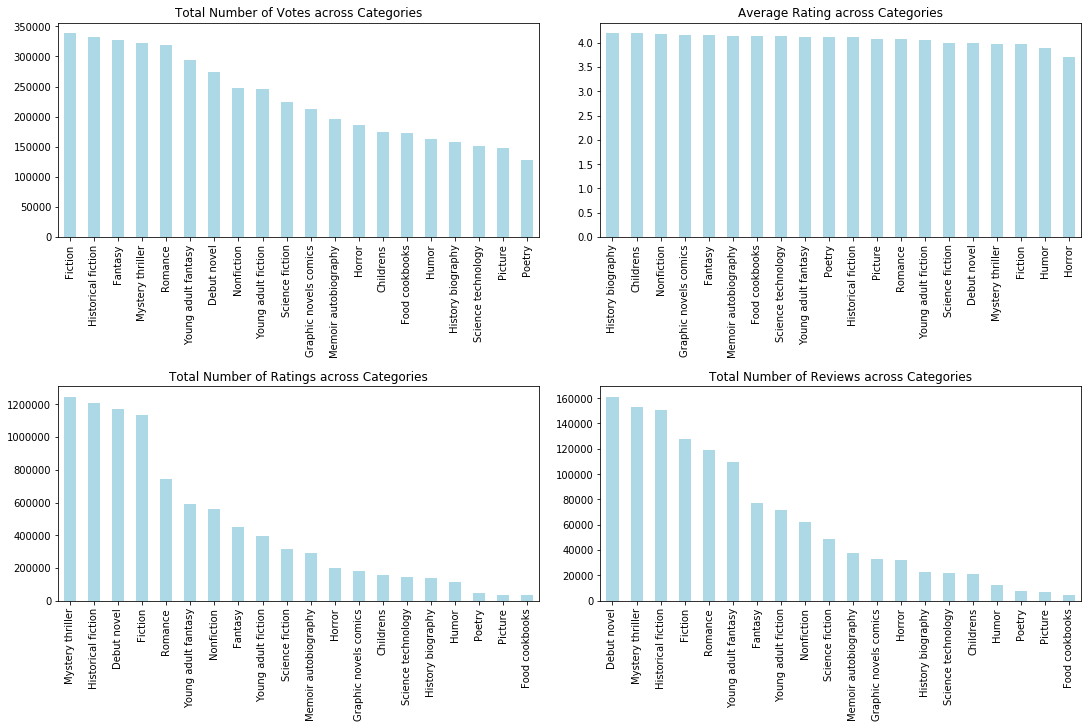

In [35]:
fig, axes = plt.subplots(2,2, figsize= (15,10),constrained_layout=True)

#Plot 1 - Number of Votes across Categories
byCategoryAndVotes = df.groupby('Category')['NumberOfVotes'].sum()
byCategoryAndVotesSorted = byCategoryAndVotes.sort_values(ascending=False)
byCategoryAndVotesSorted.plot(kind='bar', color = 'lightblue', ax=axes[0,0]);
axes[0,0].set_xlabel('');
axes[0,0].set_ylabel('');
axes[0,0].set_title('Total Number of Votes across Categories');

#Plot 2 - Average Rating across Categories
byCategoryAndRating = df.groupby('Category')['Rating'].mean()
byCategoryAndRatingSorted = byCategoryAndRating.sort_values(ascending=False)
byCategoryAndRatingSorted.plot(kind='bar', color = 'lightblue', ax=axes[0,1]);
axes[0,1].set_xlabel('');
axes[0,1].set_ylabel('');
axes[0,1].set_title('Average Rating across Categories');

#Plot 3 - Number of Ratings across Categories
byCategoryAndVotes = df.groupby('Category')['RatingCount'].sum()
byCategoryAndVotesSorted = byCategoryAndVotes.sort_values(ascending=False)
byCategoryAndVotesSorted.plot(kind='bar', color = 'lightblue', ax=axes[1,0]);
axes[1,0].set_xlabel('');
axes[1,0].set_ylabel('');
axes[1,0].set_title('Total Number of Ratings across Categories');

#Plot 4 - Number of Reviews across Categories
byCategoryAndVotes = df.groupby('Category')['ReviewCount'].sum()
byCategoryAndVotesSorted = byCategoryAndVotes.sort_values(ascending=False)
byCategoryAndVotesSorted.plot(kind='bar', color = 'lightblue', ax=axes[1,1]);
axes[1,1].set_xlabel('');
axes[1,1].set_ylabel('');
axes[1,1].set_title('Total Number of Reviews across Categories');

# Insight 2

Question: When the top 20 books in each category are ordered by their Position (i.e. Ranking), does the general Rating also follow a similar pattern?

Insight:

In general, if the Number of Votes/Rating followed a similar pattern, the slope of lines in these charts would be a negative slope. But as you can see below, the lines are pretty random which is not too surprising but it is definitely interesting to see!

Few stand outs - Horror seems pretty consistent in terms of Rating and Position following a similar pattern. In Food Cookbooks, the second voted book is way better in rating compared to others. In Young Adult Fantasy, the 5th top voted book has a much lower rating than other books.

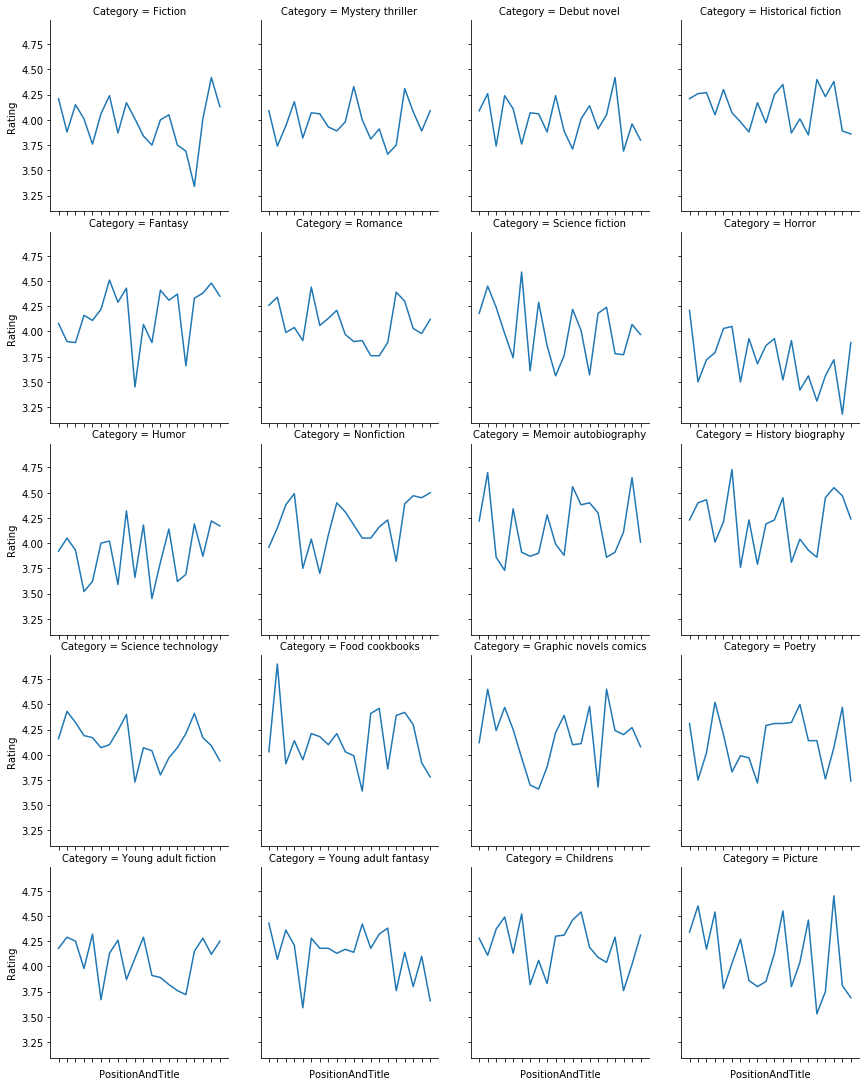

In [40]:
g = sb.FacetGrid(df, col="Category", col_wrap=4);
g = g.map(plt.plot, "PositionAndTitle", "Rating");
g.set(xticklabels=[]);

# Insight 3

Question: Does Rating Count/Review Count have a relationship with Rating? 

Insight:

There is no clear pattern here but looks like more ratings/more reviews generally mean a slighly better rating.

In [70]:
#Subsetting the data to remove Rating Count/Review Count outliers - 14 records removed.
dfSubset = df[(df.RatingCount < 100000) & (df.ReviewCount < 15000)]
dfSubset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 4 to 399
Data columns (total 10 columns):
Category            386 non-null object
NumberOfVotes       386 non-null int64
BookID              386 non-null int64
Hyperlink           386 non-null object
Title               386 non-null object
Rating              386 non-null float64
RatingCount         386 non-null int64
ReviewCount         386 non-null int64
Position            386 non-null int64
PositionAndTitle    386 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 33.2+ KB


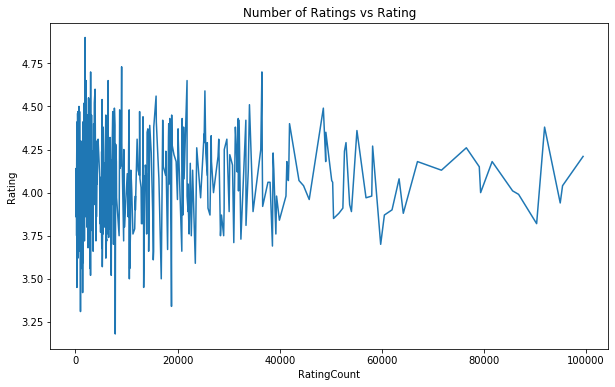

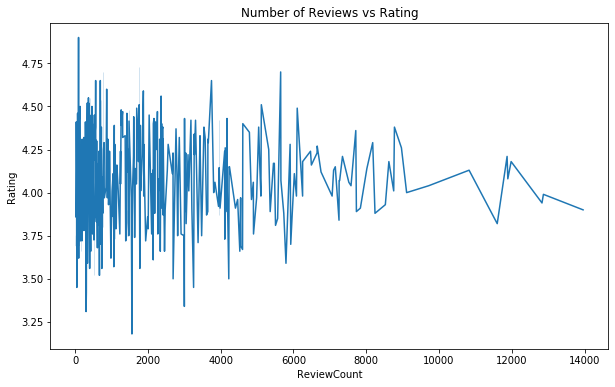

In [82]:
#Plotting rating vs rating count and review count
fig = plt.figure(figsize=(10,6))
sb.lineplot(x="RatingCount", y="Rating", data=dfSubset);
plt.title('Number of Ratings vs Rating');

fig = plt.figure(figsize=(10,6))
sb.lineplot(x="ReviewCount", y="Rating", data=dfSubset);
plt.title('Number of Reviews vs Rating');

# Miscellaneous

A few random charts/details I found interesting!

1. Review Count and Rating Count have a clear linear relationship. A book that generates a lot of ratings will also generate a lot of reviews!

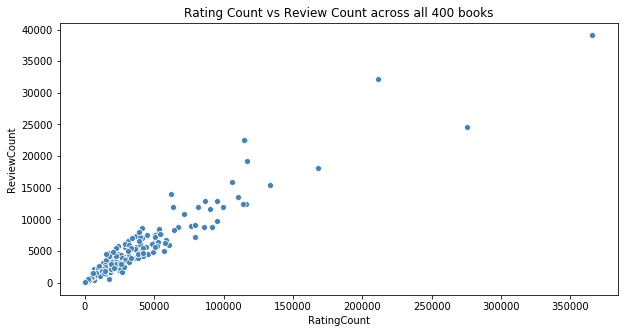

In [47]:
fig = plt.figure(figsize=(10,5));
sb.scatterplot(x="RatingCount", y="ReviewCount", data=df, color='steelblue');
plt.title('Rating Count vs Review Count across all 400 books');

2. The books with the most rating/reviews - as seen in the chart above, there are few books with an incredible number of ratings/reviews. What are they?

In [55]:
df[df['ReviewCount'] > 16000][['Title','Category','Rating','Position','RatingCount','ReviewCount']].sort_values(by=['Category','Position'])

,Title,Category,Rating,Position,RatingCount,ReviewCount
16,"Red, White & Royal Blue by Casey McQuiston",Debut novel,4.26,1,115023,22473
2,The Silent Patient by Alex Michaelides,Debut novel,4.09,2,365819,39076
0,The Testaments by Margaret Atwood,Fiction,4.21,1,167861,18041
21,Normal People by Sally Rooney,Fiction,3.88,2,275110,24560
3,Daisy Jones & The Six by Taylor Jenkins Reid,Historical fiction,4.21,1,211493,32219
1,The Silent Patient by Alex Michaelides,Mystery thriller,4.09,1,365819,39076
5,"Red, White & Royal Blue by Casey McQuiston",Romance,4.26,1,115048,22473
26,Verity by Colleen Hoover,Romance,4.34,2,117052,19251


3. Two books I knew pretty well (but have not read yet are below). It was interesting to see where they stood in their category

In [69]:
df[(df.Title == "Fire & Blood by George R.R. Martin") | (df.Title == "The Institute by Stephen King")]
#Game of Throne is third in Fantasy!
#Definitely reading The Institute and more Stephen King novels

,Category,NumberOfVotes,BookID,Hyperlink,Title,Rating,RatingCount,ReviewCount,Position,PositionAndTitle
7,Horror,75717,43798285,https://www.goodreads.com/book/show/43798285-the-institute,The Institute by Stephen King,4.21,99405,11871,1,1 - The Institute by Stephen King
44,Fantasy,32778,39943621,https://www.goodreads.com/book/show/39943621-fire-blood,Fire & Blood by George R.R. Martin,3.89,30099,3648,3,3 - Fire & Blood by George R.R. Martin


# Conclusion

This analysis aimed to show how certain categories of books are more popular than the others and the difference is quite stark as seen above. Another key point in this analysis is comparing the 'Best of 2019' books that were ranked by user votes with their general rating, rating count, and review count and see if they go hand in hand. Using Python to extract and analyze the data, the above insights shed some light on the questions I wanted to answer!